In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Bidirectional RNN (BiRNN)**

### 1. **Introduction**

A **Bidirectional Recurrent Neural Network** (BiRNN) is an extension of the standard RNN that processes data **in both forward and backward directions**.
This means it can use **past and future context** to make predictions.

It’s particularly useful in tasks where **the entire sequence is available**, such as:

* Language modeling
* Speech recognition
* Named Entity Recognition (NER)
* Part-of-Speech (POS) tagging



### 2. **Motivation**

A normal (unidirectional) RNN processes a sequence only **from past → future**.
But sometimes, understanding the **current word or event** also depends on **what comes next**.

**Example:**
In the sentence

> "He said it was a **bank**."

You need to see the next words (“of the river” or “account”) to understand the meaning of “bank.”
A BiRNN can capture that context.



### 3. **Architecture**

A BiRNN consists of **two separate RNNs**:

* One processes the sequence **forward** ((h_t^{→}))
* Another processes the sequence **backward** ((h_t^{←}))

At each time step (t), their outputs are **combined** (usually by concatenation or summation):

[
h_t = [h_t^{→} ; h_t^{←}]
]

This combined representation contains **information from both past and future**.



### 4. **Computation Steps**

1. The **forward RNN** takes inputs from (x_1) to (x_T).
2. The **backward RNN** takes inputs from (x_T) to (x_1).
3. For each time step (t), combine:
   [
   h_t = f(h_t^{→}, h_t^{←})
   ]
   where (f) is usually concatenation (`torch.cat`) or addition.



### 5. **Mathematical Formulation**

[
\begin{aligned}
h_t^{→} &= f(W^{→}x_t + U^{→}h_{t-1}^{→} + b^{→}) \
h_t^{←} &= f(W^{←}x_t + U^{←}h_{t+1}^{←} + b^{←}) \
y_t &= g(V[h_t^{→}; h_t^{←}] + c)
\end{aligned}
]

Here:

* (f) is the activation function (tanh or ReLU)
* (g) is the output function (like softmax for classification)



### 6. **Advantages**

* Learns **context from both directions**.
* Improves accuracy in tasks that depend on **surrounding information**.
* Works well with LSTM or GRU cells (i.e., **BiLSTM** and **BiGRU**).



### 7. **Limitations**

* Cannot be used in **real-time or streaming** tasks (future context not available).
* Requires **more computation and memory**, since it uses two RNNs.
* Adds **training time** compared to a unidirectional RNN.



### 8. **PyTorch Example**

```python
import torch
import torch.nn as nn

# Sequence length = 5, batch size = 3, input size = 10
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, bidirectional=True)

x = torch.randn(5, 3, 10)  # (seq_len, batch, input_size)
output, h_n = rnn(x)

print(output.shape)  # torch.Size([5, 3, 40]) → 20*2 because of bidirectional
```



### 9. **Variants**

* **Bidirectional LSTM (BiLSTM)** — commonly used in NLP models like NER and text classification.
* **Bidirectional GRU (BiGRU)** — faster and lighter alternative.



### 10. **Key Takeaways**

* BiRNNs read the sequence **forward and backward**.
* Each time step’s output contains **context from both directions**.
* Improves accuracy when **the whole sequence is known**.
* Common in **language and speech tasks**, not suitable for **real-time systems**.

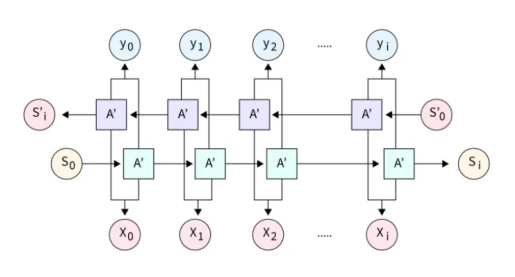

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

path = "/kaggle/input/bidirectional-rnn-png/Screenshot 2025-10-12 090111.png"
img = img.imread(path)

plt.axis('off')
plt.imshow(img)